# Advance House Price Prediction

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

## Import Data

In [2]:
df = pd.read_csv("E:\Downlload\HousePriceTrain.csv")

In [3]:
df = df.drop(['Id'],axis=1)

## Feature Engineering

In [22]:
Dummy_label_cat_df = pd.get_dummies(label_cat_df,drop_first=True)

In [23]:
len(Dummy_label_cat_df.columns)

144

In [24]:
df_number = df.select_dtypes(exclude="object")

In [25]:
len(df_number.columns)

37

In [26]:
df_number = pd.concat([df_number,Dummy_label_cat_df],axis=1)

In [27]:
len(df_number.columns)

181

In [28]:
rank_cat_df['LandContour'].value_counts(),\
rank_cat_df['Condition1'].value_counts(),\
rank_cat_df['Condition2'].value_counts(),\
rank_cat_df['ExterQual'].value_counts(),\
rank_cat_df['ExterCond'].value_counts(),\
rank_cat_df['BsmtQual'].value_counts(),\
rank_cat_df['BsmtCond'].value_counts(),\
rank_cat_df['BsmtExposure'].value_counts(),\
rank_cat_df['KitchenQual'].value_counts(),\
rank_cat_df['HeatingQC'].value_counts(),\
rank_cat_df['FireplaceQu'].value_counts(),\
rank_cat_df['GarageQual'].value_counts(),\
rank_cat_df['GarageCond'].value_counts(),\
rank_cat_df['SaleCondition'].value_counts(),\
rank_cat_df['LandContour'].unique(),\
rank_cat_df['Condition1'].unique(),\
rank_cat_df['Condition2'].unique(),\
rank_cat_df['ExterQual'].unique(),\
rank_cat_df['ExterCond'].unique(),\
rank_cat_df['BsmtQual'].unique(),\
rank_cat_df['BsmtCond'].unique(),\
rank_cat_df['BsmtExposure'].unique(),\
rank_cat_df['KitchenQual'].unique(),\
rank_cat_df['HeatingQC'].unique(),\
rank_cat_df['FireplaceQu'].unique(),\
rank_cat_df['GarageQual'].unique(),\
rank_cat_df['GarageCond'].unique(),\
rank_cat_df['SaleCondition'].unique(),\

(Lvl    1311
 Bnk      63
 HLS      50
 Low      36
 Name: LandContour, dtype: int64,
 Norm      1260
 Feedr       81
 Artery      48
 RRAn        26
 PosN        19
 RRAe        11
 PosA         8
 RRNn         5
 RRNe         2
 Name: Condition1, dtype: int64,
 Norm      1445
 Feedr        6
 RRNn         2
 Artery       2
 PosN         2
 RRAn         1
 PosA         1
 RRAe         1
 Name: Condition2, dtype: int64,
 TA    906
 Gd    488
 Ex     52
 Fa     14
 Name: ExterQual, dtype: int64,
 TA    1282
 Gd     146
 Fa      28
 Ex       3
 Po       1
 Name: ExterCond, dtype: int64,
 TA    686
 Gd    618
 Ex    121
 Fa     35
 Name: BsmtQual, dtype: int64,
 TA    1348
 Gd      65
 Fa      45
 Po       2
 Name: BsmtCond, dtype: int64,
 No    991
 Av    221
 Gd    134
 Mn    114
 Name: BsmtExposure, dtype: int64,
 TA    735
 Gd    586
 Ex    100
 Fa     39
 Name: KitchenQual, dtype: int64,
 Ex    741
 TA    428
 Gd    241
 Fa     49
 Po      1
 Name: HeatingQC, dtype: int64,
 Gd    107

In [29]:
def encode_LandContour(LandContour):
    if LandContour == 'Lvl':
        return 4
    elif LandContour == 'Bnk':
        return 3
    elif LandContour == 'HLS':
        return 2
    elif LandContour == 'Low':
        return 1
    else:
        return 0
rank_cat_df['LandContour'] = rank_cat_df['LandContour'].apply(encode_LandContour) 

In [30]:
def encode_Condition1(Condition1):
    if Condition1 == 'Norm':
        return 9
    elif Condition1 == 'Feedr':
        return 8
    elif Condition1 == 'Artery':
        return 7
    elif Condition1 == 'RRAn':
        return 6
    elif Condition1 == 'PosN':
        return 5
    elif Condition1 == 'RRAe':
        return 4
    elif Condition1 == 'PosA':
        return 3
    elif Condition1 == 'RRNn':
        return 2
    elif Condition1 == 'RRNe':
        return 1
    else:
        return 0
rank_cat_df['Condition1'] = rank_cat_df['Condition1'].apply(encode_Condition1) 

In [31]:
def encode_Condition2(Condition2):
    if Condition2 == 'Norm':
        return 8
    elif Condition2 == 'Feedr':
        return 7
    elif Condition2 == 'RRNn':
        return 6
    elif Condition2 == 'Artery':
        return 5
    elif Condition2 == 'PosN':
        return 4
    elif Condition2 == 'RRAn':
        return 3
    elif Condition2 == 'RRAe':
        return 2
    elif Condition2 == 'PosA':
        return 1
    else:
        return 0
rank_cat_df['Condition2'] = rank_cat_df['Condition2'].apply(encode_Condition2) 

In [32]:
def encode_ExterQual(ExterQual):
    if ExterQual == 'TA':
        return 4
    elif ExterQual == 'Gd':
        return 3
    elif ExterQual == 'Ex':
        return 2
    elif ExterQual == 'Fa':
        return 1
    else:
        return 0
rank_cat_df['ExterQual'] = rank_cat_df['ExterQual'].apply(encode_ExterQual) 

In [33]:
def encode_ExterCond(ExterCond):
    if ExterCond == 'TA':
        return 5
    elif ExterCond == 'Gd':
        return 4
    elif ExterCond == 'Fa':
        return 3
    elif ExterCond == 'Ex':
        return 2
    elif ExterCond == 'Po':
        return 1
    else:
        return 0
rank_cat_df['ExterCond'] = rank_cat_df['ExterCond'].apply(encode_ExterCond) 

In [34]:
def encode_BsmtQual(BsmtQual):
    if BsmtQual == 'TA':
        return 4
    elif BsmtQual == 'Gd':
        return 3
    elif BsmtQual == 'Ex':
        return 2
    elif BsmtQual == 'Fa':
        return 1
    else:
        return 0
rank_cat_df['BsmtQual'] = rank_cat_df['BsmtQual'].apply(encode_BsmtQual) 

In [35]:
def encode_BsmtCond(BsmtCond):
    if BsmtCond == 'TA':
        return 4
    elif BsmtCond == 'Gd':
        return 3
    elif BsmtCond == 'Ex':
        return 2
    elif BsmtCond == 'Fa':
        return 1
    else:
        return 0
rank_cat_df['BsmtCond'] = rank_cat_df['BsmtCond'].apply(encode_BsmtCond) 

In [36]:
def encode_BsmtExposure(BsmtExposure):
    if BsmtExposure == 'No':
        return 4
    elif BsmtExposure == 'Av':
        return 3
    elif BsmtExposure == 'Gd':
        return 2
    elif BsmtExposure == 'Mn':
        return 1
    else:
        return 0
rank_cat_df['BsmtExposure'] = rank_cat_df['BsmtExposure'].apply(encode_BsmtExposure) 

In [37]:
def encode_KitchenQual(KitchenQual):
    if KitchenQual == 'TA':
        return 4
    elif KitchenQual == 'Gd':
        return 3
    elif KitchenQual == 'Ex':
        return 2
    elif KitchenQual == 'Fa':
        return 1
    else:
        return 0
rank_cat_df['KitchenQual'] = rank_cat_df['KitchenQual'].apply(encode_KitchenQual) 

In [38]:
def encode_HeatingQC(HeatingQC):
    if HeatingQC == 'Ex':
        return 5
    elif HeatingQC == 'TA':
        return 4
    elif HeatingQC == 'Gd':
        return 3
    elif HeatingQC == 'Fa':
        return 2
    elif HeatingQC == 'Po':
        return 1
    else:
        return 0
rank_cat_df['HeatingQC'] = rank_cat_df['HeatingQC'].apply(encode_HeatingQC) 

In [39]:
def encode_FireplaceQu(FireplaceQu):
    if FireplaceQu == 'Gd':
        return 5
    elif FireplaceQu == 'TA':
        return 4
    elif FireplaceQu == 'Fa':
        return 3
    elif FireplaceQu == 'Ex':
        return 2
    elif FireplaceQu == 'Po':
        return 1
    else:
        return 0
rank_cat_df['FireplaceQu'] = rank_cat_df['FireplaceQu'].apply(encode_FireplaceQu) 

In [40]:
def encode_GarageQual(GarageQual):
    if GarageQual == 'TA':
        return 5
    elif GarageQual == 'Fa':
        return 4
    elif GarageQual == 'Gd':
        return 3
    elif GarageQual == 'Ex':
        return 2
    elif GarageQual == 'Po':
        return 1
    else:
        return 0
rank_cat_df['GarageQual'] = rank_cat_df['GarageQual'].apply(encode_GarageQual) 

In [41]:
def encode_GarageCond(GarageCond):
    if GarageCond == 'TA':
        return 5
    elif GarageCond == 'Fa':
        return 4
    elif GarageCond == 'Gd':
        return 3
    elif GarageCond == 'Po':
        return 2
    elif GarageCond == 'Ex':
        return 1
    else:
        return 0
rank_cat_df['GarageCond'] = rank_cat_df['GarageCond'].apply(encode_GarageCond) 

In [42]:
def encode_SaleCondition(SaleCondition):
    if SaleCondition == 'Normal':
        return 6
    elif SaleCondition == 'Partial':
        return 5
    elif SaleCondition == 'Abnorml':
        return 4
    elif SaleCondition == 'Family':
        return 3
    elif SaleCondition == 'Alloca':
        return 2
    elif SaleCondition == 'AdjLand':
        return 1
    else:
        return 0
rank_cat_df['SaleCondition'] = rank_cat_df['SaleCondition'].apply(encode_SaleCondition) 

In [43]:
rank_cat_df.columns

Index(['LandContour', 'Condition1', 'Condition2', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageQual', 'GarageCond', 'SaleCondition'],
      dtype='object')

In [44]:
df_number = pd.concat([df_number,rank_cat_df],axis=1)

In [45]:
len(df_number.columns)

195

In [4]:
df_number.columns.value_counts()

In [47]:
df_number_new = np.log1p(df_number)

In [3]:
df_number_new

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001118C1D0E48>,
      dtype=object)

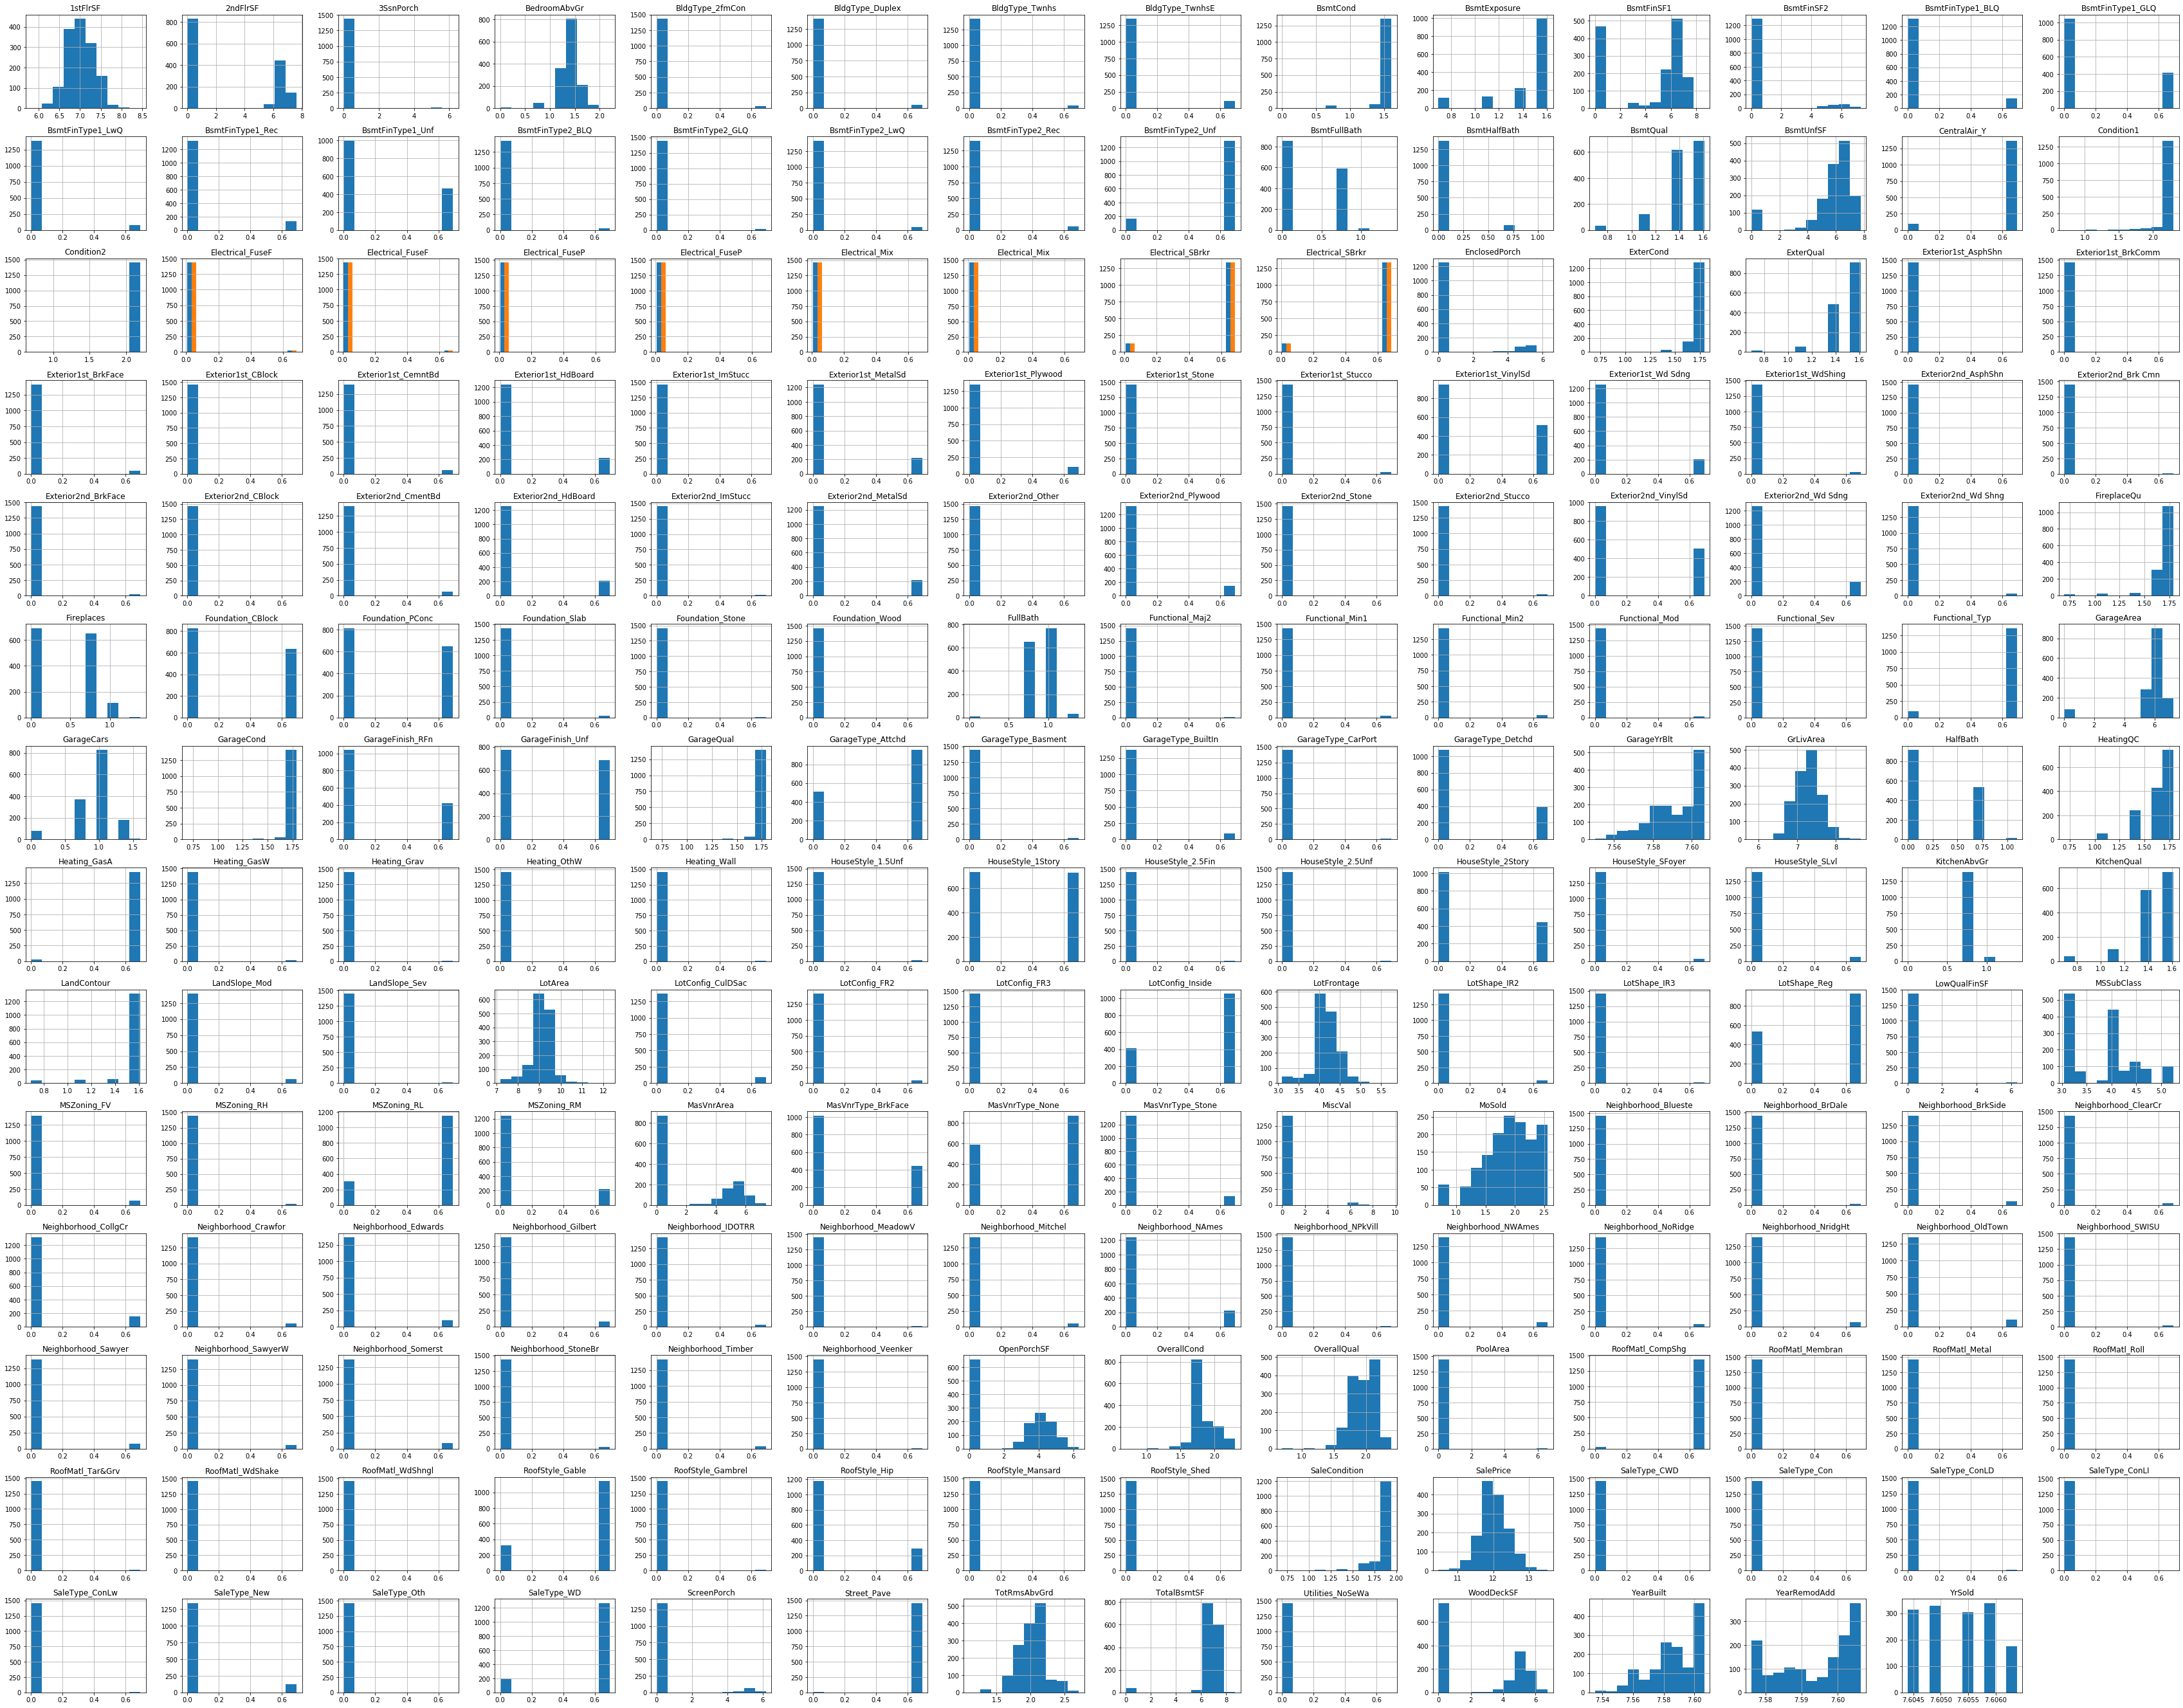

In [49]:
plt.rcParams["figure.figsize"] = 60,48
df_number_new.hist()

In [2]:
df_number_new.columns.value_counts()

In [49]:
df_number_new = df_number_new.drop(['Electrical_FuseP','Electrical_Mix','Electrical_FuseF','Electrical_SBrkr'],axis=1)

['MoSold','YearRemodAdd'] Should Not Be Removed

In [1]:
 df_number_new.columns.value_counts()